# Week 10 Instructor-led Lab: Decision Trees
#### Michelle Calderwood | April 2025 | BGEN 632

#### Setup

In [103]:
!pip install graphviz

#### Import libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder

#### Load the data

In [107]:
hospital_df = pd.read_csv('data/calihospital.txt', delimiter='\t')
hospital_df.head()

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,AvlBeds,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,135520.2186,20523425.53,...,15,721586,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,136156.6913,33447542.78,...,99,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,197094.2541,37254178.67,...,107,926378,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,139170.3798,23385570.10,...,55,856720,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,116797.8306,13684502.49,...,42,909709,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011


#### Prepare Data

##### Encode categorical variables

In [110]:
le_typecontrol = LabelEncoder()
hospital_df['TypeControl_encoded'] = le_typecontrol.fit_transform(hospital_df['TypeControl'])

le_donortype = LabelEncoder()
hospital_df['DonorType_encoded'] = le_donortype.fit_transform(hospital_df['DonorType'])

le_teaching = LabelEncoder()
hospital_df['Teaching_encoded'] = le_teaching.fit_transform(hospital_df['Teaching'])

#### Regression Tree 1: Operating Income

##### Define predictors and target

In [113]:
X_income = hospital_df[['NoFTE', 'NetPatRev', 'AvlBeds']]
y_income = hospital_df['OperInc']

##### Fit regression tree

In [115]:
reg_tree_income = DecisionTreeRegressor(random_state=42)
reg_tree_income.fit(X_income, y_income)

DecisionTreeRegressor(random_state=42)

##### Plot tree

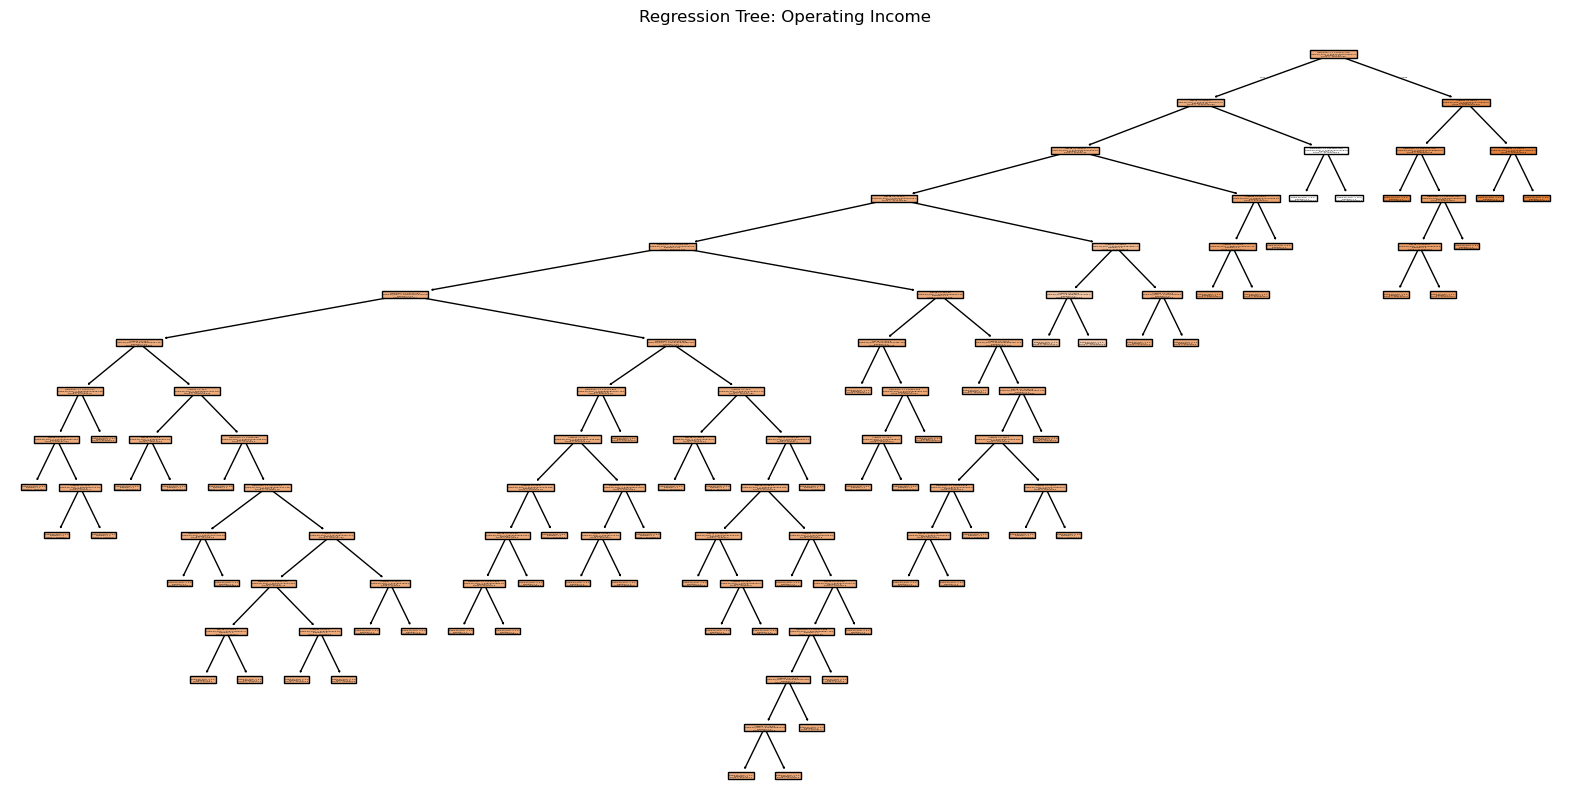

In [117]:
plt.figure(figsize=(20,10))
plot_tree(reg_tree_income, feature_names=X_income.columns, filled=True)
plt.title('Regression Tree: Operating Income')
plt.show()

##### Interpretation:

This regression tree uses predictors like Number of Full-Time Employees (NoFTE), Net Patient Revenue (NetPatRev), and Available Beds (AvLBeds). The tree is highly branched, suggesting that the relationship between these features and Operating Income is complex and nonlinear. The depth of the tree also implies potential overfitting due to the small dataset (n=61). However, the splits make intuitive sense: more staff and revenue typically indicate higher capacity and financial output, which in turn would impact operating income.

#### Regression Tree 2: Operating Revenue

In [120]:
##### Define predictors and target

In [121]:
X_revenue = hospital_df[['NoFTE', 'InOperExp', 'OutOperExp']]
y_revenue = hospital_df['OperRev']

##### Fit regression tree

In [123]:
reg_tree_revenue = DecisionTreeRegressor(random_state=42)
reg_tree_revenue.fit(X_revenue, y_revenue)

DecisionTreeRegressor(random_state=42)

##### Plot tree

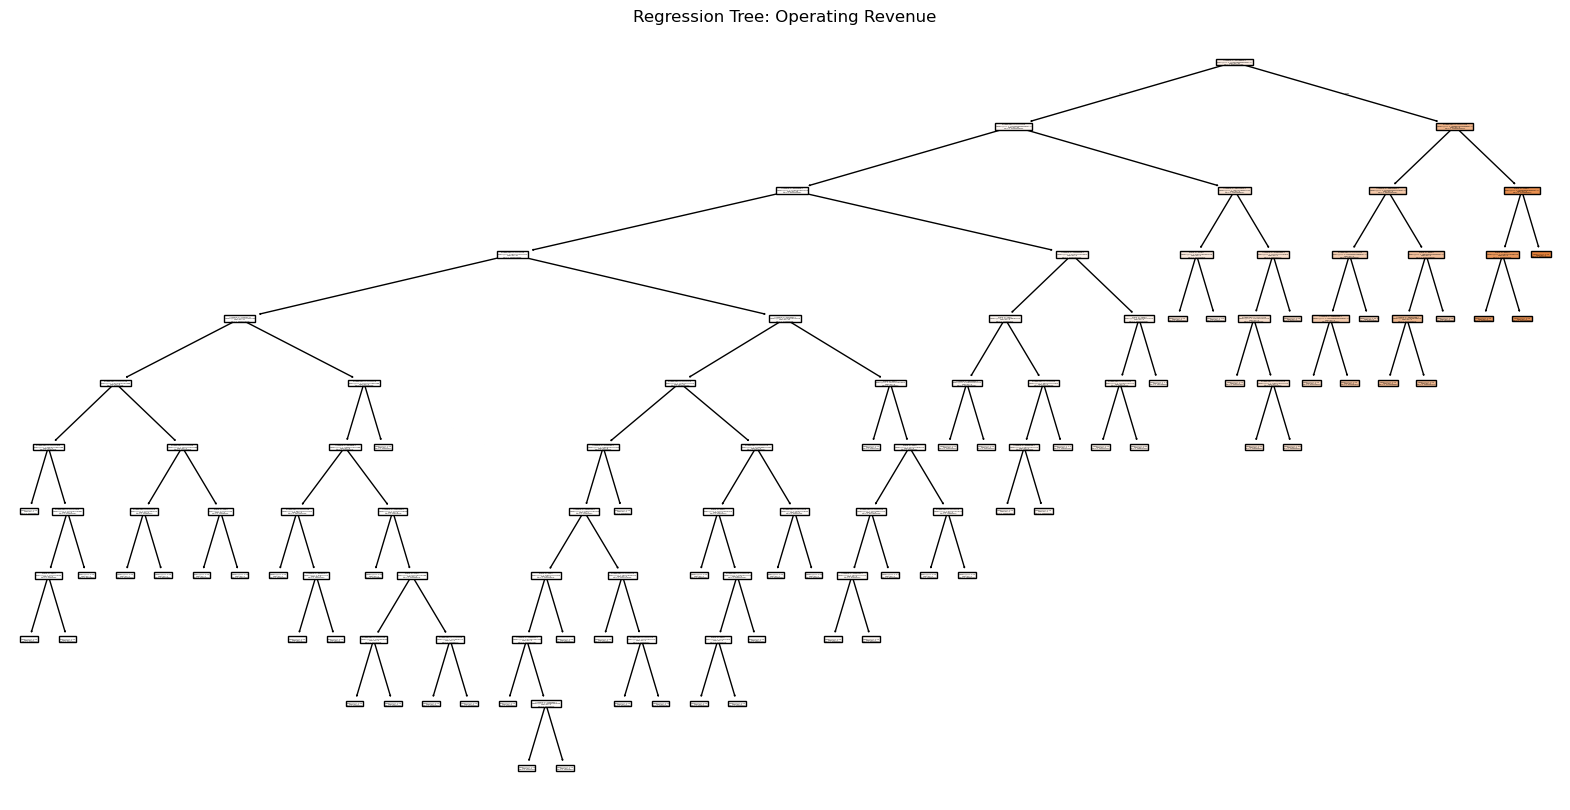

In [125]:
plt.figure(figsize=(20,10))
plot_tree(reg_tree_revenue, feature_names=X_revenue.columns, filled=True)
plt.title('Regression Tree: Operating Revenue')
plt.show()

##### Interpretation:

This regression tree predicts Operating Revenue using NoFTE, InOperExp, and OutOperExp. Similar to the Operating Income tree, it is also quite deep, reflecting the complexity in revenue generation. The use of both internal and external operating expenses as predictors is logical, as both cost categories heavily influence revenue. The splits align with expected patterns: as operating expenses change, so does revenue potential.

#### Classification Tree 1: TypeControl

##### Define predictors and target

In [129]:
X_typecontrol = hospital_df[['NoFTE', 'NetPatRev', 'Teaching_encoded']]
y_typecontrol = hospital_df['TypeControl_encoded']

##### Fit classification tree

In [131]:
clf_tree_typecontrol = DecisionTreeClassifier(random_state=42)
clf_tree_typecontrol.fit(X_typecontrol, y_typecontrol)

DecisionTreeClassifier(random_state=42)

##### Plot tree

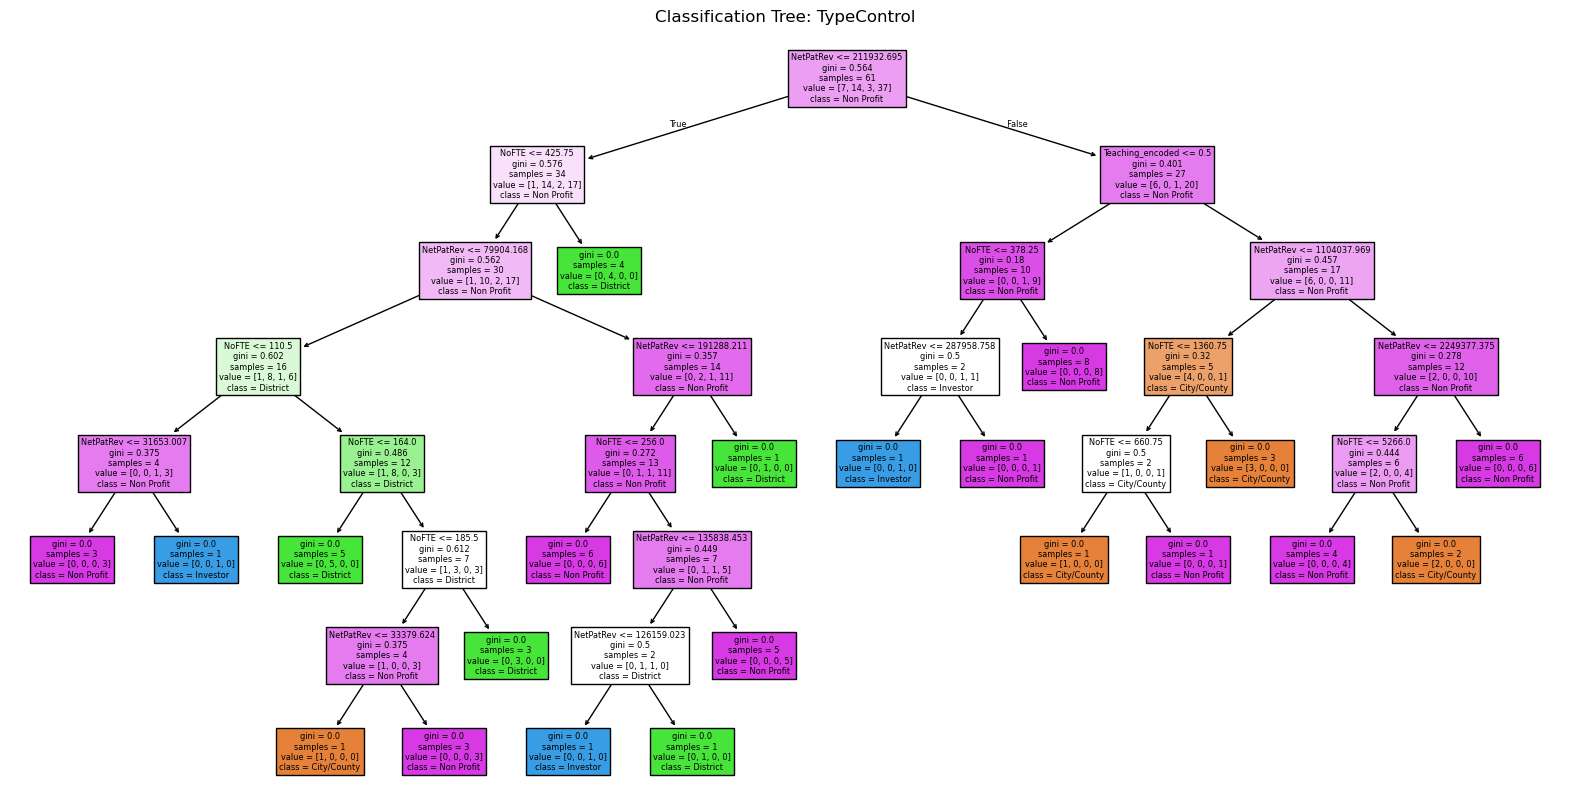

In [133]:
plt.figure(figsize=(20,10))
plot_tree(clf_tree_typecontrol, feature_names=X_typecontrol.columns, class_names=le_typecontrol.classes_, filled=True)
plt.title('Classification Tree: TypeControl')
plt.show()

##### Interpretation:

This classification tree predicts hospital ownership type using NoFTE, NetPatRev, and Teaching_encoded. The tree shows some initial ability to differentiate between control types based on staffing and revenue characteristics. The Teaching status also contributes, which makes sense—certain control types (e.g., District vs. Investor) may have structural ties to teaching hospitals. However, the branches are shallow, indicating that the features don’t clearly separate all hospital types, which may limit model usefulness.

#### Classification Tree 2: DonorType

##### Define predictors and target

In [137]:
X_donortype = hospital_df[['NoFTE', 'InOperExp', 'Teaching_encoded']]
y_donortype = hospital_df['DonorType_encoded']

##### Fit classification tree

In [139]:
clf_tree_donortype = DecisionTreeClassifier(random_state=42)
clf_tree_donortype.fit(X_donortype, y_donortype)

DecisionTreeClassifier(random_state=42)

##### Plot tree

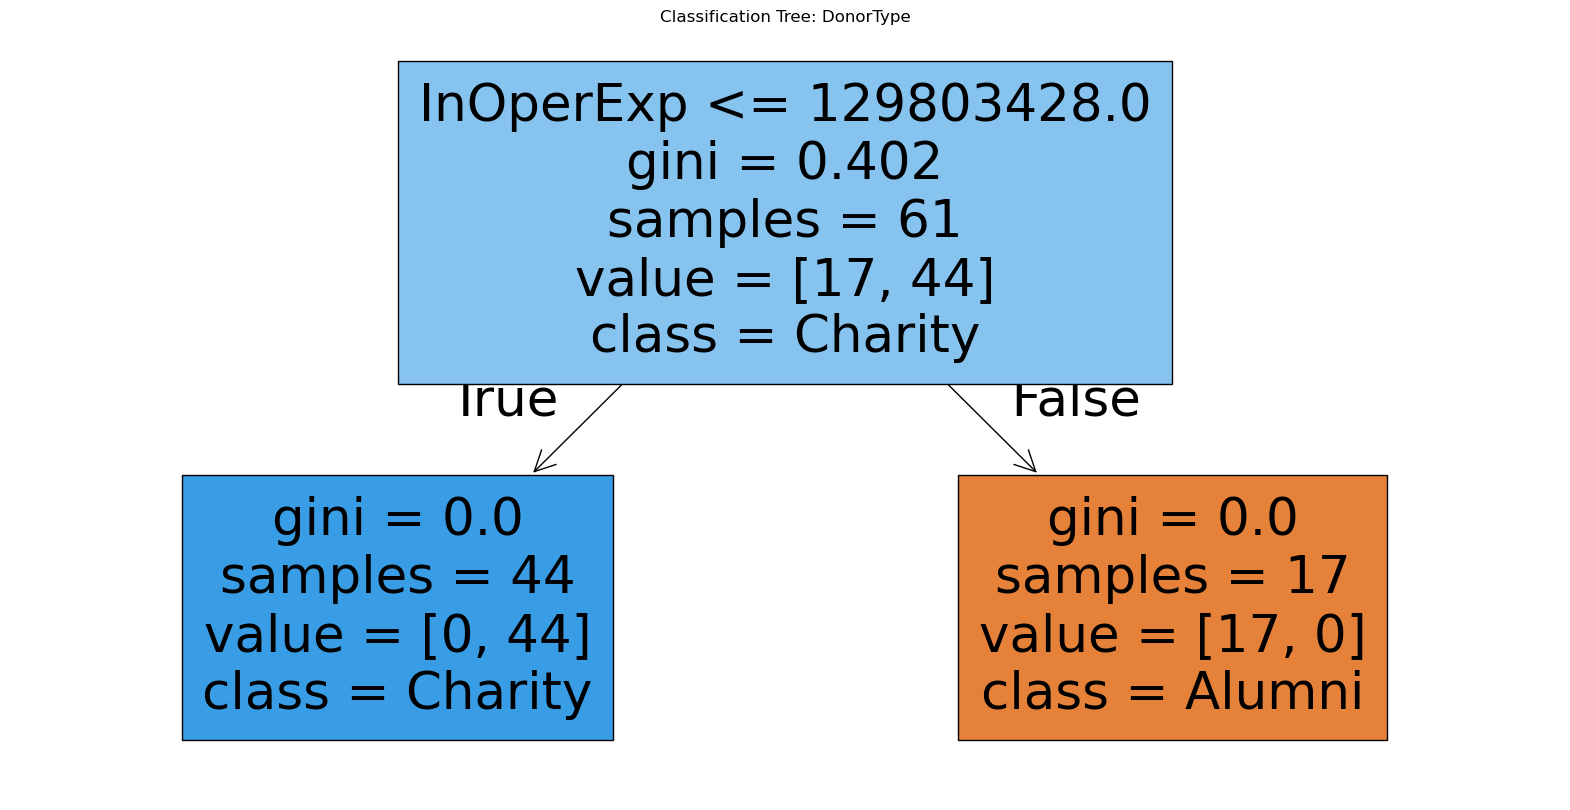

In [141]:
plt.figure(figsize=(20,10))
plot_tree(clf_tree_donortype, feature_names=X_donortype.columns, class_names=le_donortype.classes_, filled=True)
plt.title('Classification Tree: DonorType')
plt.show()

##### Interpretation:

This classification tree is very clear and strong: a single split on InOperExp (Internal Operating Expenses) perfectly classifies hospitals into either Charity or Alumni donor types. All hospitals with expenses below the threshold are classified as Charity, and all above as Alumni. The Gini index for both child nodes is 0, showing pure splits—this is an ideal case in classification. The split also makes real-world sense: higher internal expenses may be associated with more robust funding sources like alumni donors.

### Conclusion: Model Selection

#### Best Model: Classification Tree 2: DonorType

#### Reasoning:

The DonorType classification tree is the best overall model due to its simplicity and perfect classification. A single variable (InOperExp) completely separates the two classes with zero impurity (Gini = 0), demonstrating strong predictive power and clear business logic.

If a regression model must be chosen, the Operating Income tree is preferred over the Revenue tree. Income reflects bottom-line performance more directly than revenue, and this model captures complex interactions among hospital scale, patient flow, and financial results.

#### References:

[10_ChatGPT_Independent.ipynb](10_ChatGPT_Independent.ipynb)